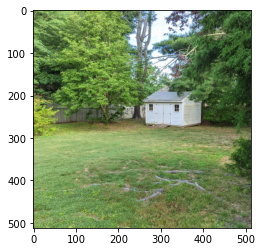

In [1]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np

#Read and display the image
A = io.imread('shed1.jpg')
plt.imshow(A) 
A = A.astype(float)

In [2]:
#Isolate the RGB channels
RC=A[:,:,0]
GC=A[:,:,1]
BC=A[:,:,2]

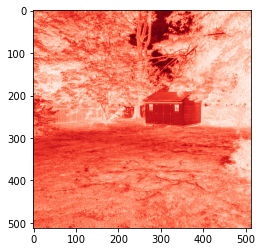

In [3]:
#display the red channel
plt.imshow(RC,cmap="Reds")
plt.imsave("Red.jpg",RC, cmap= "Reds")

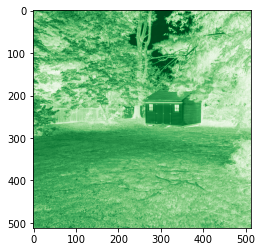

In [4]:
#display the green channel
plt.imshow(GC, cmap="Greens")

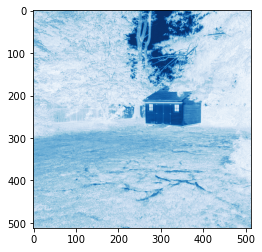

In [5]:
#display the blue channel
plt.imshow(BC, cmap="Blues")

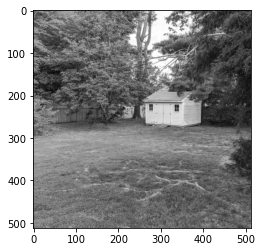

In [6]:
#compute AG and display gray image
AG=(RC+GC+BC)/3

plt.imshow(AG,cmap="gray")

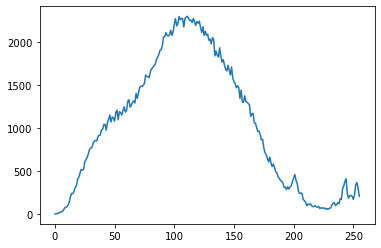

In [7]:
#plot the histogram for red channel
hist=np.zeros(256, dtype = np.intc)
for r in range(512) :
    for c in range(512) :
        hist[RC[r,c].astype(int)] += 1

plt.plot(hist)
plt.show()


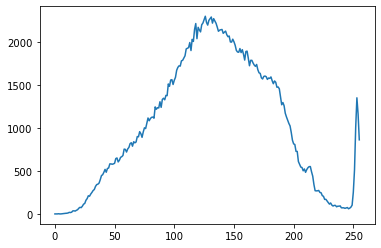

In [8]:
#plot the histogram for green channel
hist=np.zeros(256, dtype = np.intc)
for r in range(512) :
    for c in range(512) :
        hist[GC[r,c].astype(int)] += 1

plt.plot(hist)
plt.show()


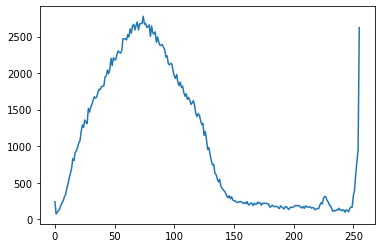

In [9]:
#plot the histogram for blue channel
hist=np.zeros(256, dtype = np.intc)
for r in range(512) :
    for c in range(512) :
        hist[BC[r,c].astype(int)] += 1

plt.plot(hist)
plt.show()

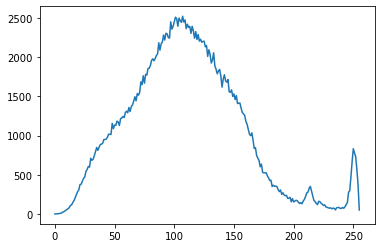

In [10]:
#plot the histogram for gray image
hist=np.zeros(256, dtype = np.intc)
for r in range(512) :
    for c in range(512) :
        hist[AG[r,c].astype(int)] += 1

plt.plot(hist)
plt.show()

Enter the threshold (TB)=100


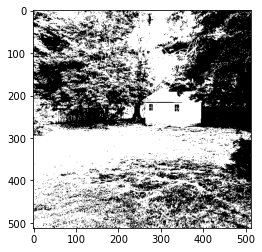

In [11]:
#Binarizing the image

AB = np.zeros_like(AG)
TB=int(input("Enter the threshold (TB)="))
for r in range(512):
    for c in range(512):
        if AG[r,c]<TB:
            AB[r,c]=0
        else:
            AB[r,c]=255

plt.imshow(AB, cmap='gray')


Enter the Threshold value (TE)=15


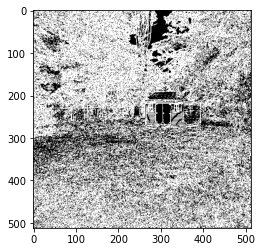

In [12]:
#Simple Edge Detection

AE=np.zeros_like(AG)

GX = np.zeros_like(AG, dtype=np.float32)
GY = np.zeros_like(AG, dtype=np.float32)


TE=int(input("Enter the Threshold value (TE)="))

#Compute gradient along rows
for r in range(512):
     for c in range(511):
        GX[r,c]=AG[r,c+1]-AG[r,c]
        
#Compute gradient along columns        
for c in range(512):
    for r in range(511):
        GY[r,c]=AG[r+1,c]-AG[r,c]
        
#Compute gradient magnitude        
GM=np.sqrt(GX**2+GY**2)

for r in range(512):
    for c in range(512):
        if GM[r,c]<TE:
            AE[r,c]=0
        else:
            AE[r,c]=255
            
plt.imshow(AE, cmap="gray")



        
        

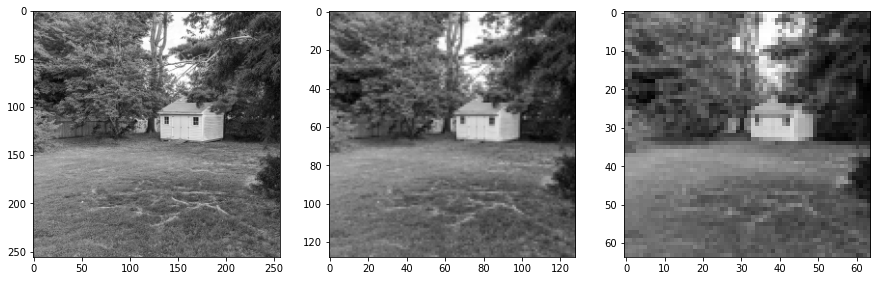

In [13]:
#Image Pyramid

import numpy as np

fig, axs=plt.subplots(1,3, figsize=(15,5))


#Compute AG2

AG2=np.zeros((256,256), dtype=float)

for r in range(256):
    for c in range(256):
        value=AG[(r)*2 : (r+1)*2,(c)*2 : (c+1)*2]
        
        AG2[r,c]=np.mean(value)

axs[0].imshow(AG2, cmap="gray")



#Compute AG4

AG4=np.zeros((128,128), dtype=float)

for r in range(128):
    for c in range(128):
        value=AG2[(r)*2 : (r+1)*2,(c)*2 : (c+1)*2]
        
        AG4[r,c]=np.mean(value)

axs[1].imshow(AG4, cmap="gray")



#Compute AG8

AG8=np.zeros((64,64), dtype=float)

for r in range(64):
    for c in range(64):
        value=AG4[(r)*2 : (r+1)*2,(c)*2 : (c+1)*2]
        
        AG8[r,c]=np.mean(value)

axs[2].imshow(AG8, cmap="gray")

plt.show()




